In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


# Loading the data

In [3]:
import pandas as pd

FILE_PATH = '/kaggle/input/playground-series-s3e19/train.csv'
sales_data = pd.read_csv(FILE_PATH)

In [4]:
sales_data

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


# Preprocessing

### Investigating Missing Values

In [6]:
missing_values = sales_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


### Checking for outliers

In [7]:
from scipy import stats
z_scores = stats.zscore(sales_data['num_sold'])
outlier_threshold = 3

outliers = sales_data[abs(z_scores) > outlier_threshold]

In [8]:
outliers

,id,date,country,store,product,num_sold
25,25,2017-01-01,Canada,Kagglazon,Using LLMs to Improve Your Coding,1041
26,26,2017-01-01,Canada,Kagglazon,Using LLMs to Train More LLMs,1101
28,28,2017-01-01,Canada,Kagglazon,Using LLMs to Win More Kaggle Competitions,1062
29,29,2017-01-01,Canada,Kagglazon,Using LLMs to Write Better,866
55,55,2017-01-01,Japan,Kagglazon,Using LLMs to Improve Your Coding,938
...,...,...,...,...,...,...
136901,136901,2021-12-31,Canada,Kagglazon,Using LLMs to Train More LLMs,1333
136903,136903,2021-12-31,Canada,Kagglazon,Using LLMs to Win More Kaggle Competitions,1247
136904,136904,2021-12-31,Canada,Kagglazon,Using LLMs to Write Better,906
136915,136915,2021-12-31,Estonia,Kagglazon,Using LLMs to Improve Your Coding,771


<Axes: >

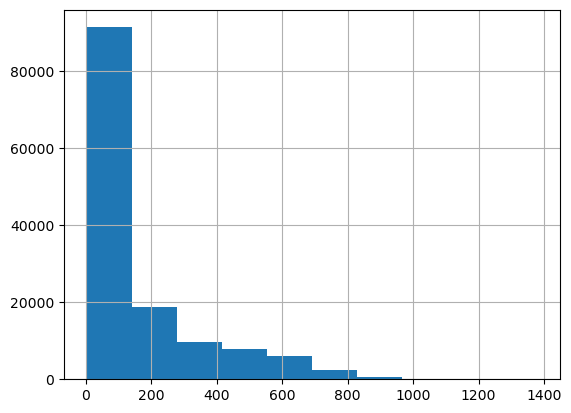

In [9]:
sales_data['num_sold'].hist()

In [10]:
print('skewness value of num_sold: ',sales_data['num_sold'].skew())

skewness value of num_sold:  1.7474379368441684


<Axes: xlabel='num_sold'>

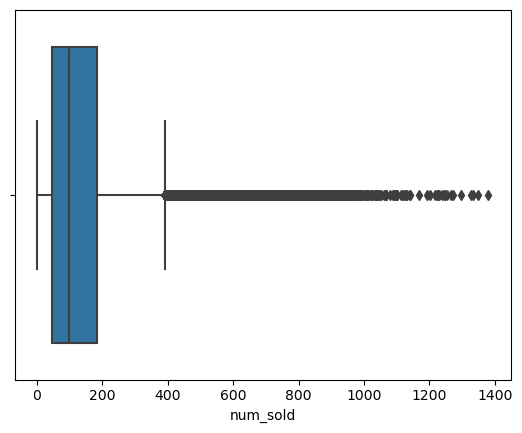

In [11]:
import seaborn as sns

sns.boxplot(x='num_sold', data=sales_data)

### Categorical Variables: One Hot Encoding

In [12]:
categorical_columns = []
for column in sales_data.columns:
    if sales_data[column].dtype == 'object' and len(sales_data[column].unique()) <= 5:
        categorical_columns.append(column)

print("Categorical columns suitable for one-hot encoding:")
print(categorical_columns)

Categorical columns suitable for one-hot encoding:
['country', 'store', 'product']


Based on this, we will apply one hot encoding to the columns store and product. We are nos using label based encoding because the categories are not correlated and we do not want to introduce new relationships between them.

In [13]:
categorical_features = ["store", "product", "country"]
sales_data_encoded = pd.get_dummies(sales_data, columns=categorical_features)

In [14]:
# Changing sales_data so that it holds the encoded dataframe
sales_data = sales_data_encoded
sales_data.head()

,id,date,num_sold,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain
0,0,2017-01-01,63,0,1,0,1,0,0,0,0,1,0,0,0,0
1,1,2017-01-01,66,0,1,0,0,1,0,0,0,1,0,0,0,0
2,2,2017-01-01,9,0,1,0,0,0,1,0,0,1,0,0,0,0
3,3,2017-01-01,59,0,1,0,0,0,0,1,0,1,0,0,0,0
4,4,2017-01-01,49,0,1,0,0,0,0,0,1,1,0,0,0,0


### Adding new columns based on date

In [15]:
sales_data['date'] = sales_data['date'].astype('datetime64[ns]')

In [16]:
# Assuming 'date_column' is the name of the column containing the date
sales_data['day'] = sales_data['date'].dt.day
sales_data['month'] = sales_data['date'].dt.month
sales_data['year'] = sales_data['date'].dt.year

In [17]:
# Assuming 'date_column' is the name of the column containing the date
sales_data['is_weekend'] = sales_data['date'].dt.dayofweek // 5  # 1 if weekend (Saturday or Sunday), 0 otherwise

In [18]:
# Assuming 'month' is the column containing the month information
# We'll use the following mapping for seasons:
# Winter: 0, Spring: 1, Summer: 2, Autumn/Fall: 3

season_mapping = {
    12: 0, 1: 0, 2: 0,  # Winter
    3: 1, 4: 1, 5: 1,    # Spring
    6: 2, 7: 2, 8: 2,    # Summer
    9: 3, 10: 3, 11: 3   # Autumn/Fall
}

sales_data['season'] = sales_data['month'].map(season_mapping)
sales_data = sales_data.drop('date', axis=1)

In [19]:
sales_data.sample(100)

,id,num_sold,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,day,month,year,is_weekend,season
81803,81803,144,0,0,1,0,0,0,1,0,0,0,0,1,0,27,12,2019,0,0
116459,116459,581,1,0,0,0,0,0,0,1,0,0,0,1,0,2,4,2021,0,1
65978,65978,119,0,0,1,0,0,0,1,0,0,0,0,1,0,30,5,2019,0,1
112499,112499,387,1,0,0,0,0,0,0,1,0,0,0,0,1,8,2,2021,0,0
43672,43672,30,0,0,1,0,0,1,0,0,0,1,0,0,0,6,8,2018,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130520,130520,224,0,0,1,1,0,0,0,0,0,1,0,0,0,7,10,2021,0,3
110469,110469,102,0,0,1,0,0,0,0,1,0,0,0,0,1,12,1,2021,0,0
104997,104997,63,1,0,0,0,0,1,0,0,0,0,0,0,1,31,10,2020,1,3
115660,115660,135,1,0,0,1,0,0,0,0,1,0,0,0,0,23,3,2021,0,1


# Exploratory Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sales_data.columns

Index(['id', 'num_sold', 'store_Kagglazon', 'store_Kaggle Learn',
       'store_Kaggle Store', 'product_Using LLMs to Improve Your Coding',
       'product_Using LLMs to Train More LLMs',
       'product_Using LLMs to Win Friends and Influence People',
       'product_Using LLMs to Win More Kaggle Competitions',
       'product_Using LLMs to Write Better', 'country_Argentina',
       'country_Canada', 'country_Estonia', 'country_Japan', 'country_Spain',
       'day', 'month', 'year', 'is_weekend', 'season'],
      dtype='object')

### Univariate

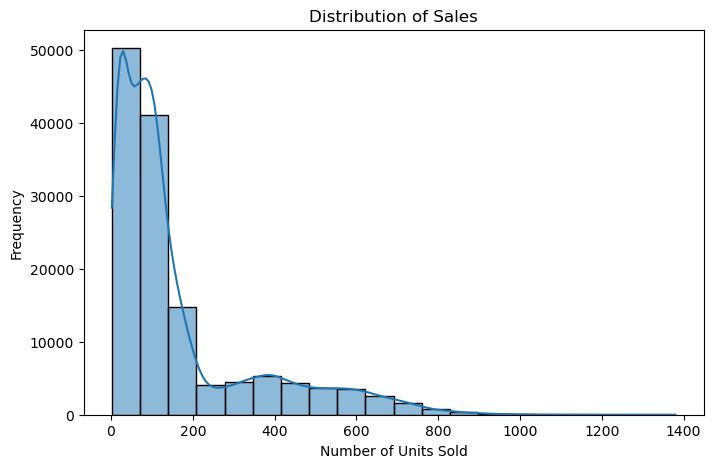

In [21]:
# Histogram - Distribution of Sales (num_sold)
plt.figure(figsize=(8, 5))
sns.histplot(data=sales_data, x='num_sold', bins=20, kde=True)
plt.xlabel('Number of Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

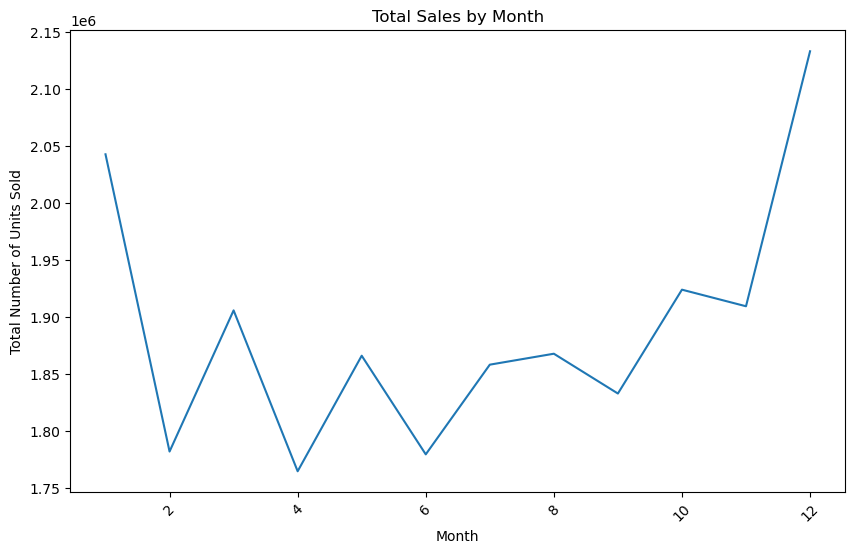

In [22]:
# Group by 'month' and calculate the total units sold for each month
monthly_sales = sales_data.groupby('month')['num_sold'].sum().reset_index()

# Line Plot - Total Sales by Month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='num_sold', data=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Number of Units Sold')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

# Training and Evaluation

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' contains the feature columns and 'y' contains the target column 'num_sold'
X = sales_data.drop('num_sold', axis=1)
y = sales_data['num_sold']

# Hyperparameter Tuning
# Define the parameter distributions for Randomized Search
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]
}

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=0)

# Initialize the Randomized Search with the model and parameter distributions
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv=5, verbose = 2, random_state=0, n_jobs = -1, scoring = 'neg_root_mean_squared_error')

# Perform the Randomized Search to find the best hyperparameters
random_search.fit(X, y)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the training set using the best model
y_pred = best_model.predict(X)

# Model Evaluation on the training set
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Squared Error (MSE): 159.01
Root Mean Squared Error (RMSE): 12.61
R-squared (R2) Score: 1.00


In [25]:
final_model = best_model

# Preparing Test Data

In [26]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv')
test_data.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


Applying one hot encoding

In [27]:
categorical_features = ["store", "product", "country"]
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)
test_data = test_data_encoded
test_data.head()

,id,date,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain
0,136950,2022-01-01,0,1,0,1,0,0,0,0,1,0,0,0,0
1,136951,2022-01-01,0,1,0,0,1,0,0,0,1,0,0,0,0
2,136952,2022-01-01,0,1,0,0,0,1,0,0,1,0,0,0,0
3,136953,2022-01-01,0,1,0,0,0,0,1,0,1,0,0,0,0
4,136954,2022-01-01,0,1,0,0,0,0,0,1,1,0,0,0,0


Adding new column based on date

In [28]:
test_data['date'] = test_data['date'].astype('datetime64[ns]')


# Assuming 'date_column' is the name of the column containing the date
test_data['day'] = test_data['date'].dt.day
test_data['month'] = test_data['date'].dt.month
test_data['year'] = test_data['date'].dt.year


# Assuming 'date_column' is the name of the column containing the date
test_data['is_weekend'] = test_data['date'].dt.dayofweek // 5  # 1 if weekend (Saturday or Sunday), 0 otherwise


# Assuming 'month' is the column containing the month information
# We'll use the following mapping for seasons:
# Winter: 0, Spring: 1, Summer: 2, Autumn/Fall: 3

season_mapping = {
    12: 0, 1: 0, 2: 0,  # Winter
    3: 1, 4: 1, 5: 1,    # Spring
    6: 2, 7: 2, 8: 2,    # Summer
    9: 3, 10: 3, 11: 3   # Autumn/Fall
}

test_data['season'] = test_data['month'].map(season_mapping)
X_test = test_data.drop('date', axis=1)

In [29]:
X_test.head()

,id,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,day,month,year,is_weekend,season
0,136950,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,2022,1,0
1,136951,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,2022,1,0
2,136952,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,2022,1,0
3,136953,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,2022,1,0
4,136954,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,2022,1,0


# Fitting model to Test Data

In [30]:
y_pred_test = final_model.predict(X_test).flatten()
print(y_pred_test)

[ 35.75254315  36.83466043   6.69202171 ... 110.92869215 575.39883976
 473.91746714]


In [31]:
y_pred_test = np.floor(y_pred_test).astype(int)
y_pred_test[y_pred_test < 0] = 0
y_pred_test

array([ 35,  36,   6, ..., 110, 575, 473])

# Producing Submission File

In [32]:
submission_df = pd.DataFrame({'id': test_data['id'], 'num_sold': y_pred_test})
submission_df

,id,num_sold
0,136950,35
1,136951,36
2,136952,6
3,136953,33
4,136954,28
...,...,...
27370,164320,640
27371,164321,616
27372,164322,110
27373,164323,575


# Convert submission to CSV

In [34]:
submission_df.to_csv('submission.csv', index=False)